
Random Forest RMSE: 0.5832550131549409


/tmp/local/52105814/ipykernel_1324171/826325325.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Solute_Concentration"], y=y_pred, ax=axes[3, 0], palette="coolwarm")


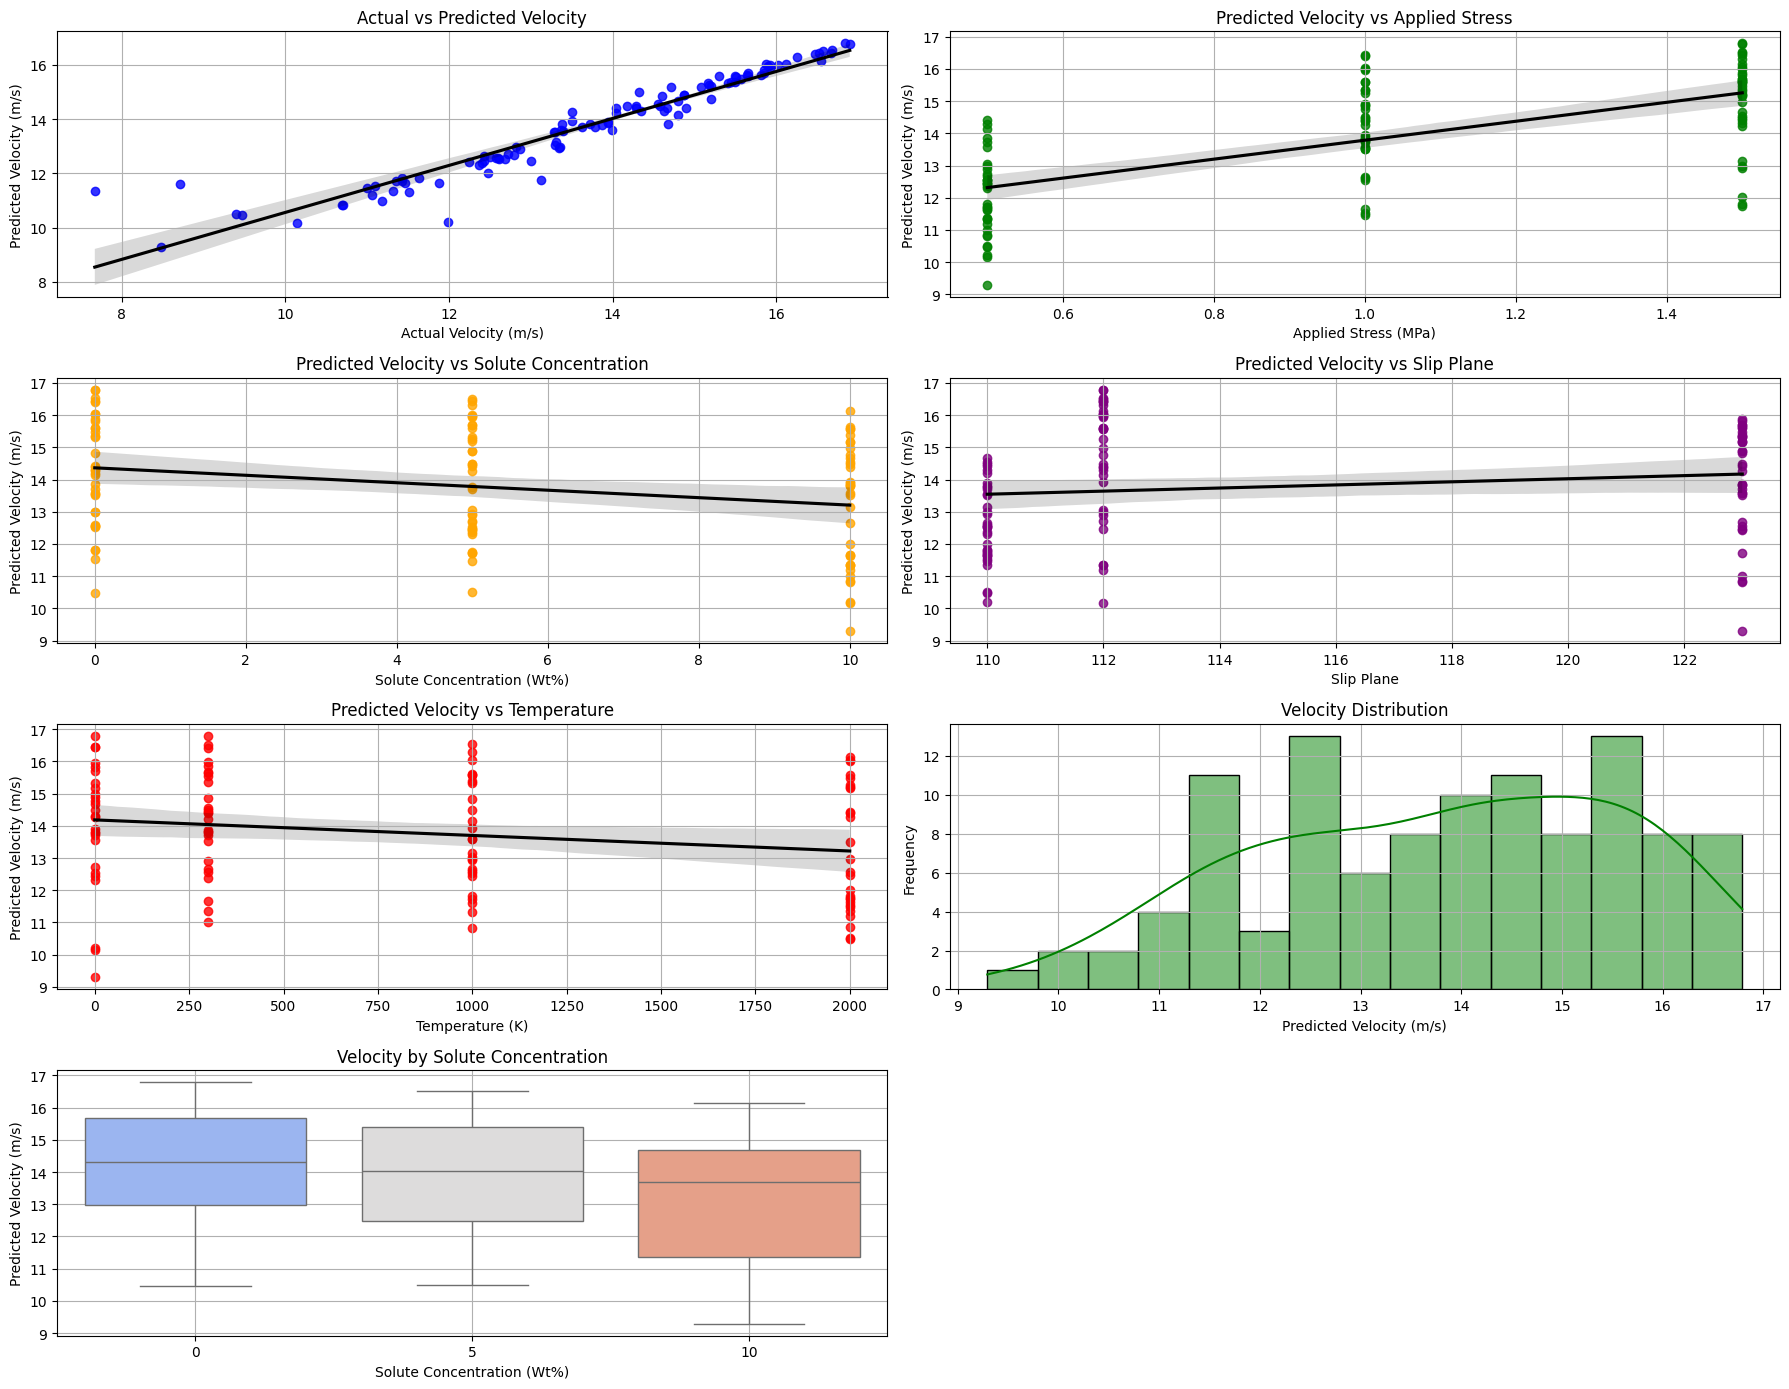

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

# Load the dataset
df = pd.read_csv("../data/processed/cleaned_data.csv")

# Define features (X) and target variable (y)
X = df[["Solute_Concentration", "Slip_plane", "Temperature", "Applied_stress"]]
y = df["Velocity"]

# Load trained Random Forest model
rf_model = joblib.load("../models/random_forest_model.pkl")

# Make predictions
y_pred = rf_model.predict(X)

# Load RMSE from results file
with open("../results/random_forest_rmse.txt", "r") as f:
    model_rmse = float(f.read())

# Print RMSE
print(f"\nRandom Forest RMSE: {model_rmse}")

# Create a **4-row, 2-column** figure
fig, axes = plt.subplots(4, 2, figsize=(18, 14))

#Scatter plot: Actual vs Predicted Velocity
sns.regplot(x=y, y=y_pred, ax=axes[0, 0], color="blue", line_kws={"color": "black"})
axes[0, 0].set_xlabel("Actual Velocity (m/s)")
axes[0, 0].set_ylabel("Predicted Velocity (m/s)")
axes[0, 0].set_title("Actual vs Predicted Velocity")
axes[0, 0].grid(True)

# Scatter plot: Applied Stress vs Predicted Velocity
sns.regplot(x=df["Applied_stress"], y=y_pred, ax=axes[0, 1], color="green", line_kws={"color": "black"})
axes[0, 1].set_xlabel("Applied Stress (MPa)")
axes[0, 1].set_ylabel("Predicted Velocity (m/s)")
axes[0, 1].set_title("Predicted Velocity vs Applied Stress")
axes[0, 1].grid(True)

# Scatter plot: Solute Concentration vs Predicted Velocity
sns.regplot(x=df["Solute_Concentration"], y=y_pred, ax=axes[1, 0], color="orange", line_kws={"color": "black"})
axes[1, 0].set_xlabel("Solute Concentration (Wt%)")
axes[1, 0].set_ylabel("Predicted Velocity (m/s)")
axes[1, 0].set_title("Predicted Velocity vs Solute Concentration")
axes[1, 0].grid(True)

# Scatter plot: Slip Plane vs Predicted Velocity
sns.regplot(x=df["Slip_plane"], y=y_pred, ax=axes[1, 1], color="purple", line_kws={"color": "black"})
axes[1, 1].set_xlabel("Slip Plane")
axes[1, 1].set_ylabel("Predicted Velocity (m/s)")
axes[1, 1].set_title("Predicted Velocity vs Slip Plane")
axes[1, 1].grid(True)

# Scatter plot: Temperature vs Predicted Velocity
sns.regplot(x=df["Temperature"], y=y_pred, ax=axes[2, 0], color="red", line_kws={"color": "black"})
axes[2, 0].set_xlabel("Temperature (K)")
axes[2, 0].set_ylabel("Predicted Velocity (m/s)")
axes[2, 0].set_title("Predicted Velocity vs Temperature")
axes[2, 0].grid(True)

# Histogram of Predicted Velocity
sns.histplot(y_pred, bins=15, kde=True, color="green", edgecolor='black', ax=axes[2, 1])
axes[2, 1].set_xlabel("Predicted Velocity (m/s)")
axes[2, 1].set_ylabel("Frequency")
axes[2, 1].set_title("Velocity Distribution")
axes[2, 1].grid(True)

# Box plot: Predicted Velocity grouped by Solute Concentration
sns.boxplot(x=df["Solute_Concentration"], y=y_pred, ax=axes[3, 0], palette="coolwarm")
axes[3, 0].set_xlabel("Solute Concentration (Wt%)")
axes[3, 0].set_ylabel("Predicted Velocity (m/s)")
axes[3, 0].set_title("Velocity by Solute Concentration")
axes[3, 0].grid(True)

# Remove empty subplot
fig.delaxes(axes[3, 1])

# Adjust layout for better readability
plt.tight_layout()
plt.show()
